In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

df.isnull().sum()


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [4]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.drop(columns=["Person ID"])


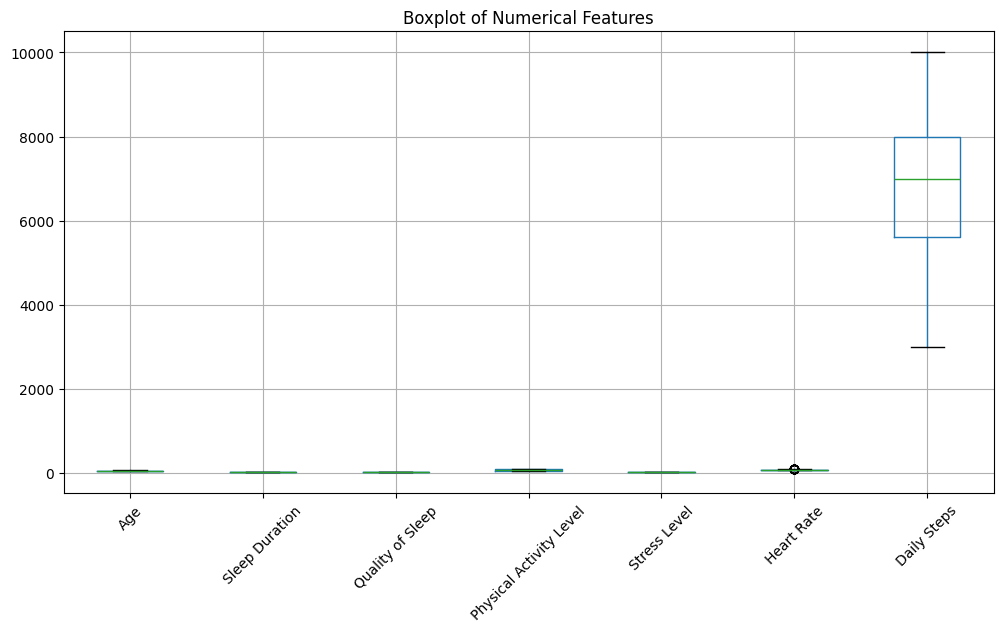

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["Age", "Sleep Duration", "Quality of Sleep",
                "Physical Activity Level", "Stress Level",
                "Heart Rate", "Daily Steps"]

plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

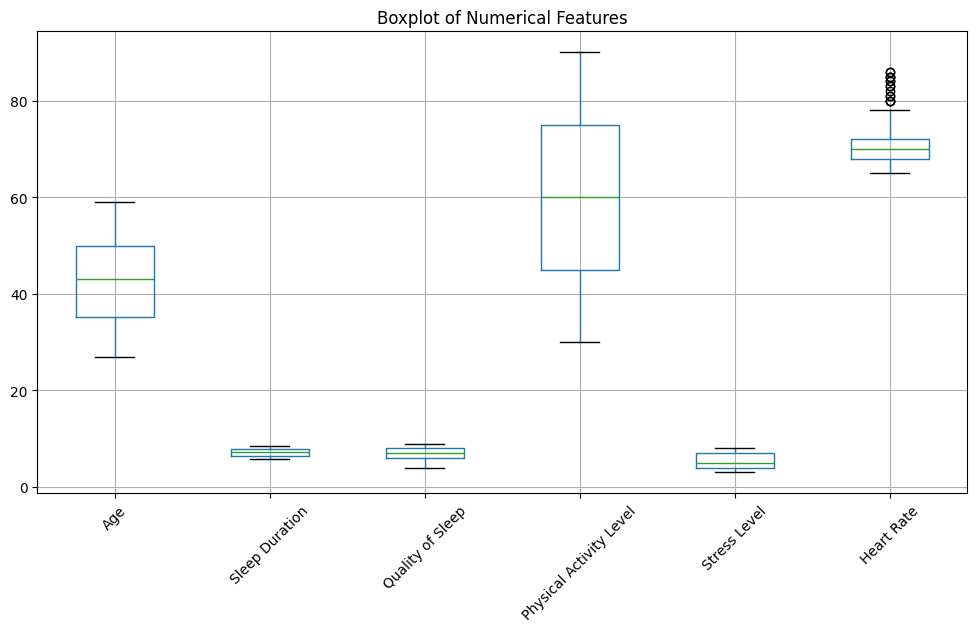

In [8]:
numeric_cols = ["Age", "Sleep Duration", "Quality of Sleep",
                "Physical Activity Level", "Stress Level",
                "Heart Rate"]

plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])

df = pd.get_dummies(df, columns=["Occupation"], drop_first=True)

df = pd.get_dummies(df, columns=["Sleep Disorder"], drop_first=True)

df.head()
df.shape


(374, 22)

In [10]:
from sklearn.preprocessing import StandardScaler


numeric_cols = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Stress Level",
    "Heart Rate",
    "Daily Steps"
]


scaler = StandardScaler()


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


df.head()
df.describe()


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,0.505348,-4.559633e-16,1.348891e-15,2.469801e-16,-3.324732e-17,1.994839e-16,-1.377389e-15,-9.499234e-17
std,0.500641,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,0.000000,-1.753096e+00,-1.676439e+00,-2.771424e+00,-1.402260e+00,-1.345836e+00,-1.250750e+00,-2.362273e+00
25%,0.000000,-8.006081e-01,-9.213348e-01,-1.098280e+00,-6.812078e-01,-7.815505e-01,-5.243827e-01,-7.531140e-01
50%,1.000000,9.415288e-02,8.547080e-02,-2.617083e-01,3.984423e-02,-2.172650e-01,-4.013793e-02,1.133560e-01
75%,1.000000,9.023241e-01,8.405750e-01,5.748635e-01,7.608963e-01,9.113060e-01,4.441068e-01,7.322631e-01
max,1.000000,1.941401e+00,1.721530e+00,1.411435e+00,1.481948e+00,1.475592e+00,3.833820e+00,1.970077e+00


In [11]:
df.to_csv("cleaned_sleep_dataset.csv", index=False)


In [ ]:
df.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,0.505348,-4.559633e-16,1.348891e-15,2.469801e-16,-3.324732e-17,1.994839e-16,-1.377389e-15,-9.499234e-17
std,0.500641,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,0.000000,-1.753096e+00,-1.676439e+00,-2.771424e+00,-1.402260e+00,-1.345836e+00,-1.250750e+00,-2.362273e+00
25%,0.000000,-8.006081e-01,-9.213348e-01,-1.098280e+00,-6.812078e-01,-7.815505e-01,-5.243827e-01,-7.531140e-01
50%,1.000000,9.415288e-02,8.547080e-02,-2.617083e-01,3.984423e-02,-2.172650e-01,-4.013793e-02,1.133560e-01
75%,1.000000,9.023241e-01,8.405750e-01,5.748635e-01,7.608963e-01,9.113060e-01,4.441068e-01,7.322631e-01
max,1.000000,1.941401e+00,1.721530e+00,1.411435e+00,1.481948e+00,1.475592e+00,3.833820e+00,1.970077e+00


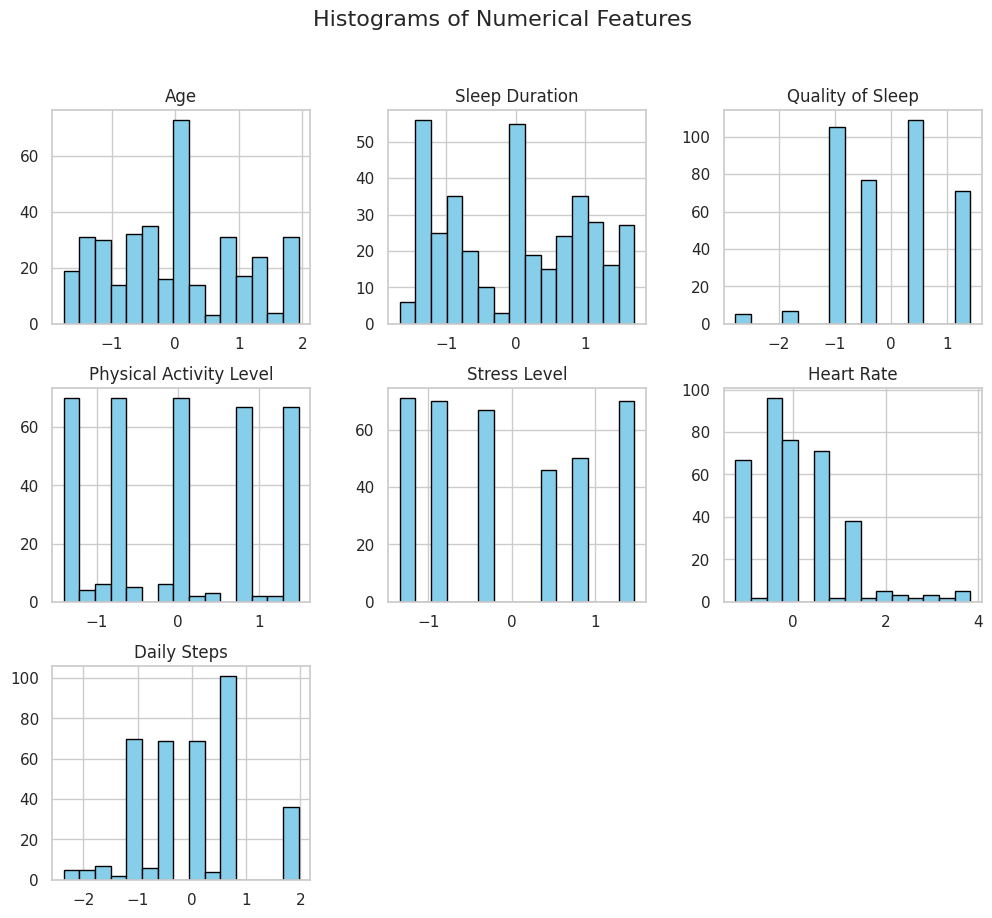

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Numerical Columns
numeric_cols = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Stress Level",
    "Heart Rate",
    "Daily Steps"
]

# 1) HISTOGRAMS
df[numeric_cols].hist(figsize=(12, 10), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

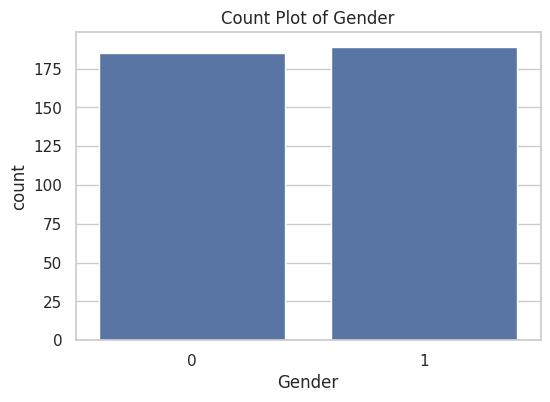

In [ ]:
# 2) COUNT PLOT
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Count Plot of Gender")
plt.show()

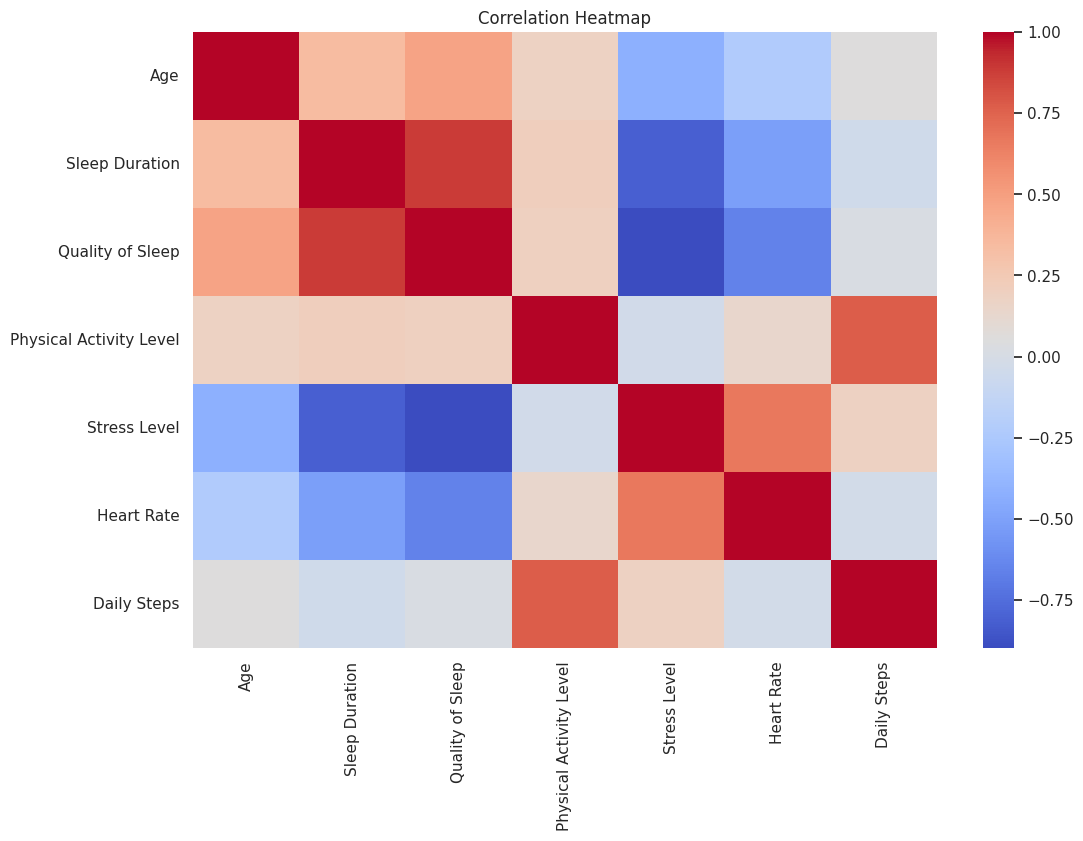

In [ ]:
# 3) CORRELATION HEATMAP
plt.figure(figsize=(12, 8))
corr =  df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

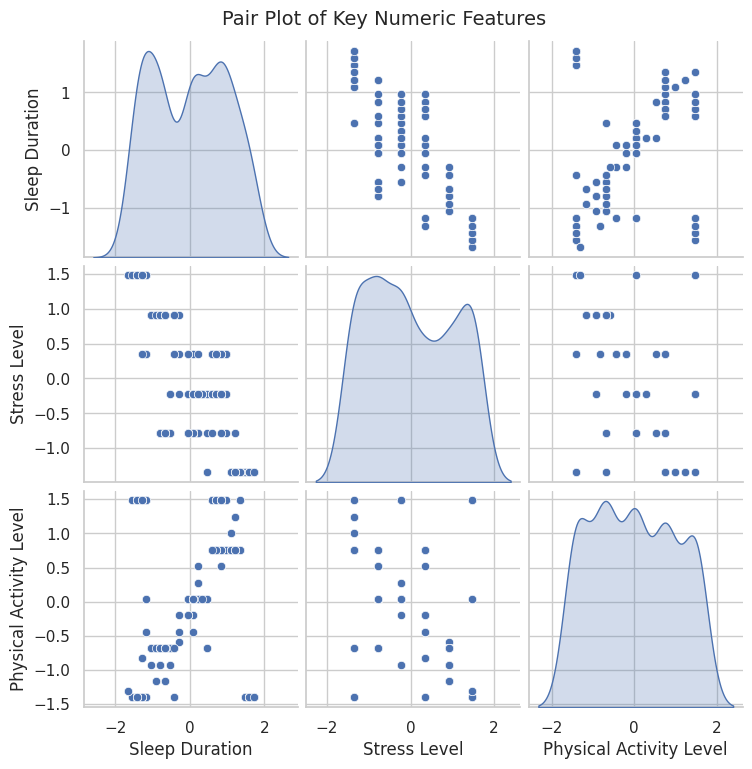

In [ ]:
# 4) PAIR PLOT
pair_cols = [
    "Sleep Duration",
    "Stress Level",
    "Physical Activity Level"
]

sns.pairplot(df[pair_cols], diag_kind="kde")
plt.suptitle("Pair Plot of Key Numeric Features", y=1.02, fontsize=14)
plt.show()
